In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data_train = pd.read_csv('data/train.csv')

## Số liệu thống kê mô tả

In [4]:
features = ['s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9','s10',  's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21','ttf','label_bnc']
col_names = ['s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9','s10',  's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']
data_train[features].shape

(20631, 23)

In [5]:
data_train[features].head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [6]:
data_train[features].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.150259
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.357334
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000


In [7]:
data_train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   s1         20631 non-null  float64
 1   s2         20631 non-null  float64
 2   s3         20631 non-null  float64
 3   s4         20631 non-null  float64
 4   s5         20631 non-null  float64
 5   s6         20631 non-null  float64
 6   s7         20631 non-null  float64
 7   s8         20631 non-null  float64
 8   s9         20631 non-null  float64
 9   s10        20631 non-null  float64
 10  s11        20631 non-null  float64
 11  s12        20631 non-null  float64
 12  s13        20631 non-null  float64
 13  s14        20631 non-null  float64
 14  s15        20631 non-null  float64
 15  s16        20631 non-null  float64
 16  s17        20631 non-null  int64  
 17  s18        20631 non-null  int64  
 18  s19        20631 non-null  float64
 19  s20        20631 non-null  float64
 20  s21   

## Biểu diễn dữ liệu khuyết thiếu:

<AxesSubplot:>

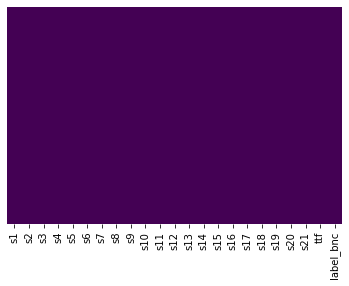

In [8]:
%matplotlib inline
sns.heatmap(data=data_train[features].isnull(), yticklabels=False, cbar =False, cmap = 'viridis')

## xử lí giá trị ngoại lại

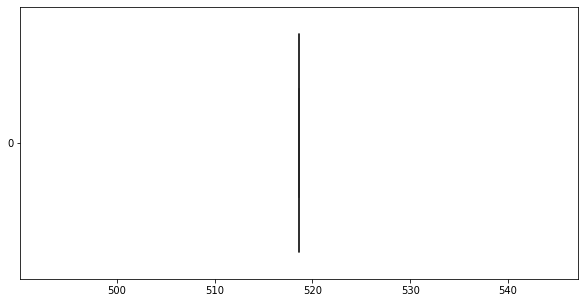

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s1'],orient="h",color = 'g') 
plt.show()

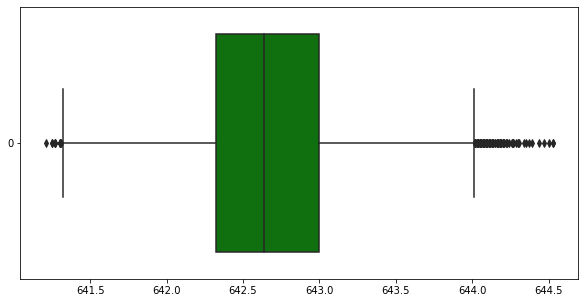

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s2'],orient="h",color = 'g') 
plt.show()

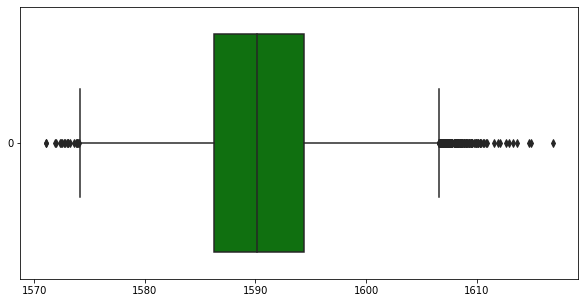

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s3'],orient="h",color = 'g') 
plt.show()

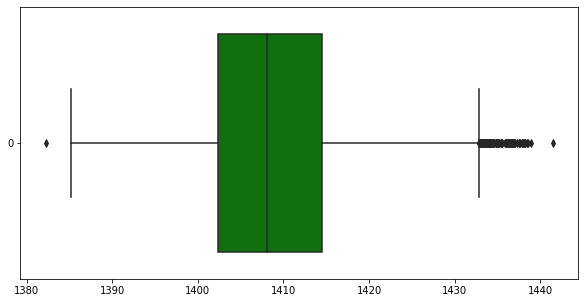

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s4'],orient="h",color = 'g') 
plt.show()

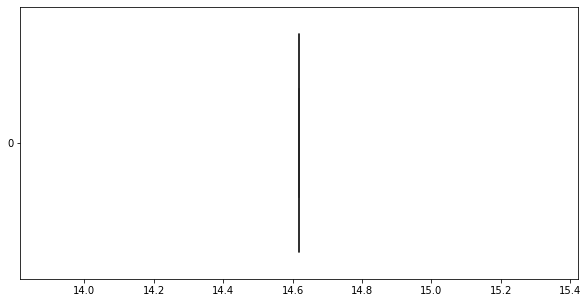

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s5'],orient="h",color = 'g') 
plt.show()

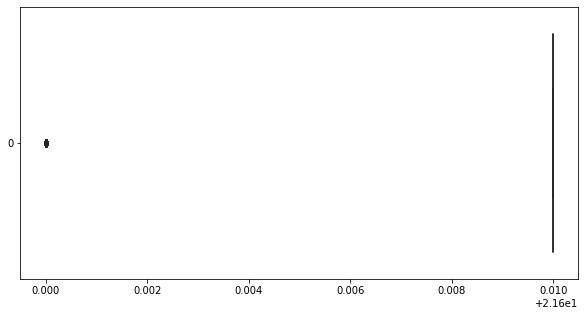

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s6'],orient="h",color = 'g') 
plt.show()

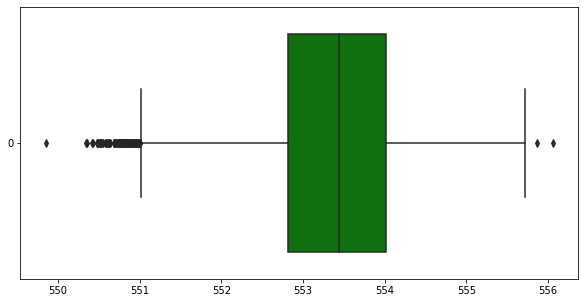

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s7'],orient="h",color = 'g') 
plt.show()

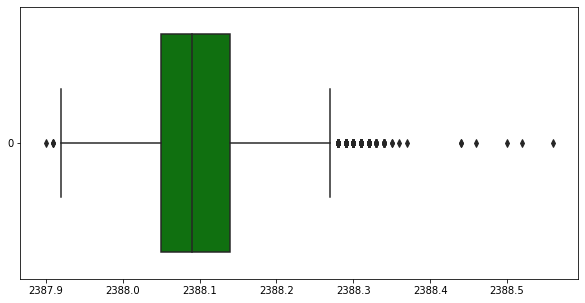

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s8'],orient="h",color = 'g') 
plt.show()

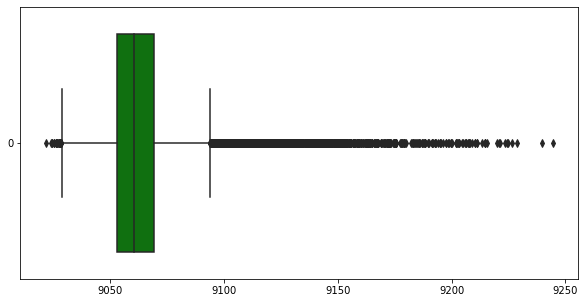

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s9'],orient="h",color = 'g') 
plt.show()

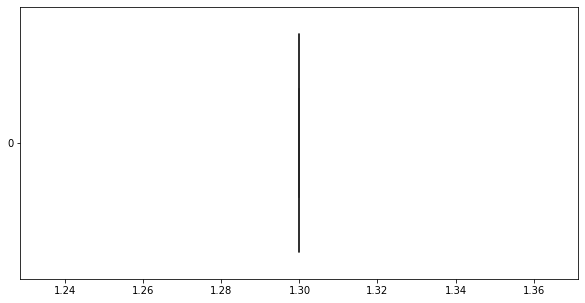

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s10'],orient="h",color = 'g') 
plt.show()

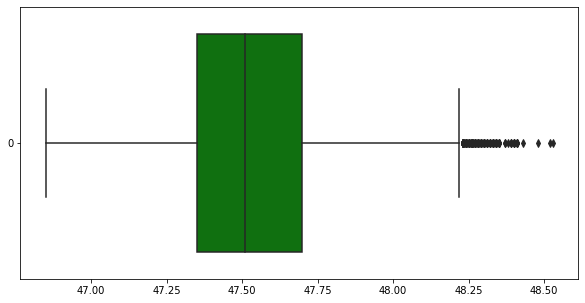

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s11'],orient="h",color = 'g') 
plt.show()

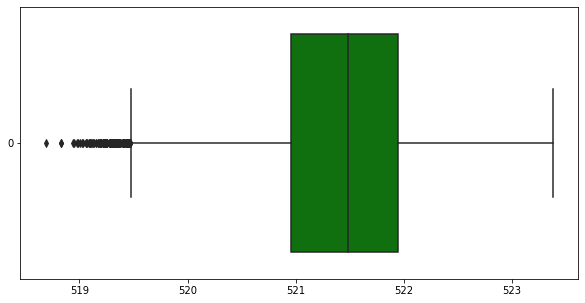

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s12'],orient="h",color = 'g') 
plt.show()

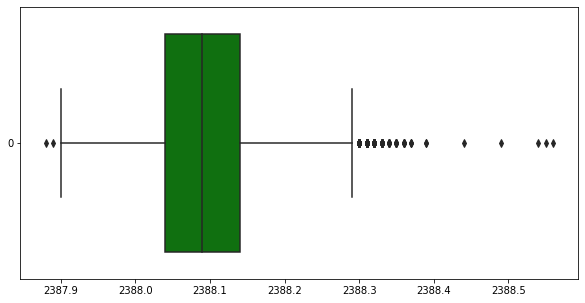

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s13'],orient="h",color = 'g') 
plt.show()

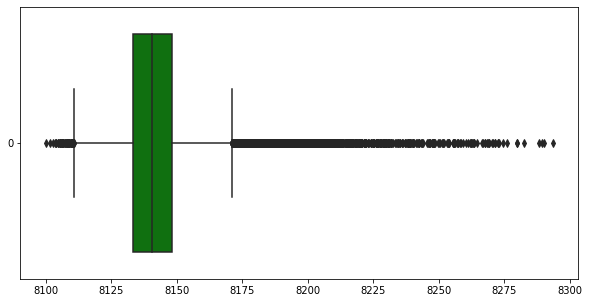

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s14'],orient="h",color = 'g') 
plt.show()

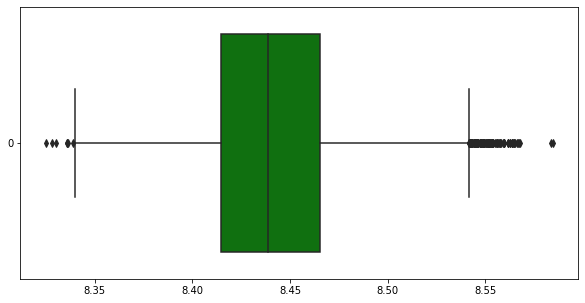

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s15'],orient="h",color = 'g') 
plt.show()

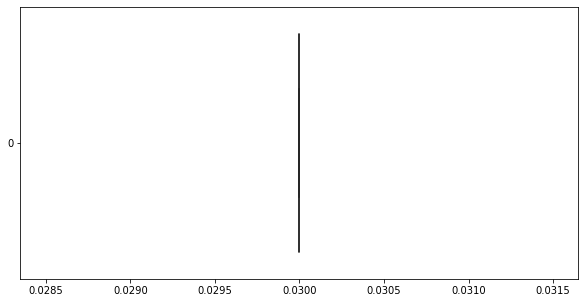

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s16'],orient="h",color = 'g') 
plt.show()

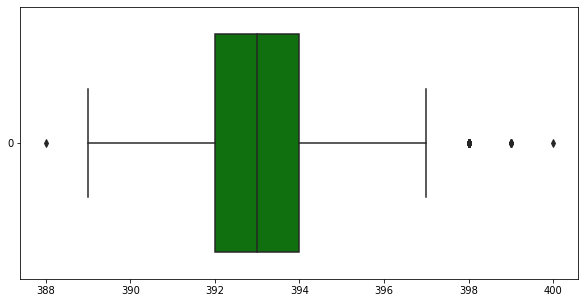

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s17'],orient="h",color = 'g') 
plt.show()

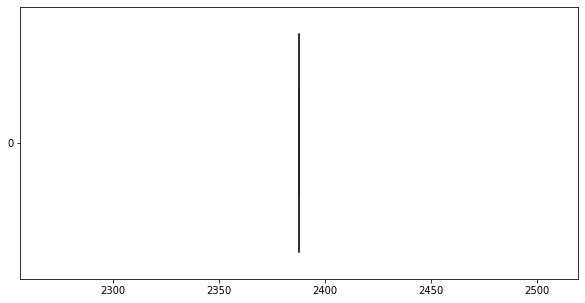

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s18'],orient="h",color = 'g') 
plt.show()

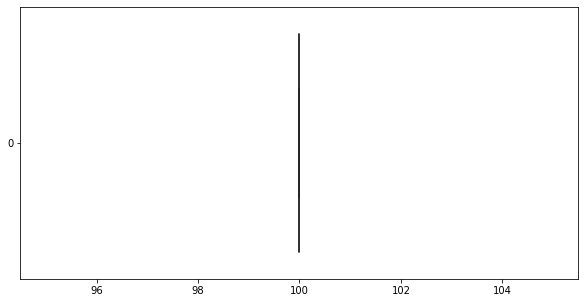

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s19'],orient="h",color = 'g') 
plt.show()

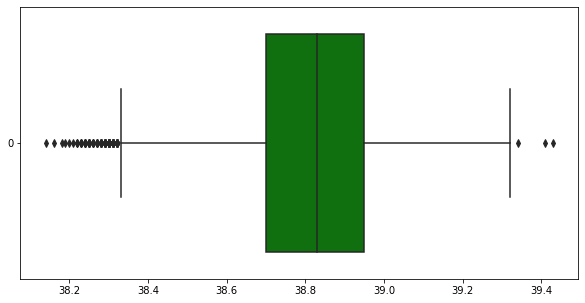

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s20'],orient="h",color = 'g') 
plt.show()

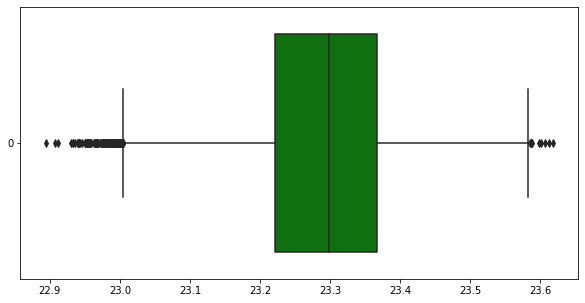

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data_train['s21'],orient="h",color = 'g') 
plt.show()

In [30]:
data = data_train[features]

In [31]:
factor = 3
upper_lim = data['s2'].mean () + data['s2'].std () * factor
lower_lim = data['s2'].mean () - data['s2'].std () * factor

data = data[(data['s2'] < upper_lim) & (data['s2'] > lower_lim)]

In [32]:
factor = 3
upper_lim = data['s3'].mean () + data['s3'].std () * factor
lower_lim = data['s3'].mean () - data['s3'].std () * factor

data = data[(data['s3'] < upper_lim) & (data['s3'] > lower_lim)]

In [33]:
factor = 3
upper_lim = data['s4'].mean () + data['s4'].std () * factor
lower_lim = data['s4'].mean () - data['s4'].std () * factor

data = data[(data['s4'] < upper_lim) & (data['s4'] > lower_lim)]

In [34]:
factor = 3
upper_lim = data['s6'].mean () + data['s6'].std () * factor
lower_lim = data['s6'].mean () - data['s6'].std () * factor

data = data[(data['s6'] < upper_lim) & (data['s6'] > lower_lim)]

In [35]:
factor = 3
upper_lim = data['s7'].mean () + data['s7'].std () * factor
lower_lim = data['s7'].mean () - data['s7'].std () * factor

data = data[(data['s7'] < upper_lim) & (data['s7'] > lower_lim)]

In [36]:
factor = 3
upper_lim = data['s8'].mean () + data['s8'].std () * factor
lower_lim = data['s8'].mean () - data['s8'].std () * factor

data = data[(data['s8'] < upper_lim) & (data['s8'] > lower_lim)]

In [37]:
factor = 3
upper_lim = data['s9'].mean () + data['s9'].std () * factor
lower_lim = data['s9'].mean () - data['s9'].std () * factor

data = data[(data['s9'] < upper_lim) & (data['s9'] > lower_lim)]

In [38]:
factor = 3
upper_lim = data['s11'].mean () + data['s11'].std () * factor
lower_lim = data['s11'].mean () - data['s11'].std () * factor

data = data[(data['s11'] < upper_lim) & (data['s11'] > lower_lim)]

In [39]:
factor = 3
upper_lim = data['s12'].mean () + data['s12'].std () * factor
lower_lim = data['s12'].mean () - data['s12'].std () * factor

data = data[(data['s12'] < upper_lim) & (data['s12'] > lower_lim)]

In [40]:
factor = 3
upper_lim = data['s13'].mean () + data['s13'].std () * factor
lower_lim = data['s13'].mean () - data['s13'].std () * factor

data = data[(data['s13'] < upper_lim) & (data['s13'] > lower_lim)]

In [41]:
factor = 3
upper_lim = data['s14'].mean () + data['s14'].std () * factor
lower_lim = data['s14'].mean () - data['s14'].std () * factor

data = data[(data['s14'] < upper_lim) & (data['s14'] > lower_lim)]

In [42]:
factor = 3
upper_lim = data['s15'].mean () + data['s15'].std () * factor
lower_lim = data['s15'].mean () - data['s15'].std () * factor

data = data[(data['s15'] < upper_lim) & (data['s15'] > lower_lim)]

In [43]:
factor = 3
upper_lim = data['s21'].mean () + data['s21'].std () * factor
lower_lim = data['s21'].mean () - data['s21'].std () * factor

data = data[(data['s21'] < upper_lim) & (data['s21'] > lower_lim)]

In [44]:
factor = 3
upper_lim = data['s17'].mean () + data['s17'].std () * factor
lower_lim = data['s17'].mean () - data['s17'].std () * factor

data = data[(data['s17'] < upper_lim) & (data['s17'] > lower_lim)]

In [45]:
factor = 3
upper_lim = data['s20'].mean () + data['s20'].std () * factor
lower_lim = data['s20'].mean () - data['s20'].std () * factor

data = data[(data['s20'] < upper_lim) & (data['s20'] > lower_lim)]

In [46]:
data

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,518.67,643.69,1599.85,1423.15,14.62,21.61,551.61,2388.18,9069.69,1.3,...,8139.78,8.4870,0.03,397,2388,100.0,38.65,23.0591,11,1
20620,518.67,643.12,1594.45,1426.04,14.62,21.61,551.06,2388.21,9064.74,1.3,...,8142.28,8.5162,0.03,395,2388,100.0,38.42,23.0603,10,1
20622,518.67,643.53,1601.23,1419.48,14.62,21.61,551.14,2388.17,9060.45,1.3,...,8143.46,8.4892,0.03,397,2388,100.0,38.56,23.0770,8,1
20623,518.67,643.09,1599.81,1428.93,14.62,21.61,552.04,2388.29,9067.57,1.3,...,8142.02,8.5424,0.03,397,2388,100.0,38.47,23.0230,7,1


In [79]:
X=data[col_names]
y = data['ttf']


<AxesSubplot:xlabel='s2', ylabel='s3'>

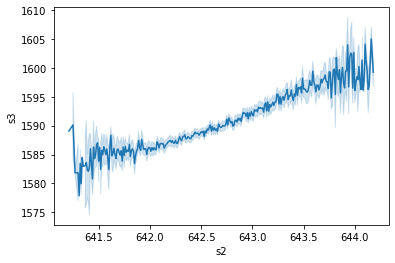

In [49]:
sns.lineplot(x='s2', y='s3', data=X) # from s1 to s21

<AxesSubplot:xlabel='s1', ylabel='s2'>

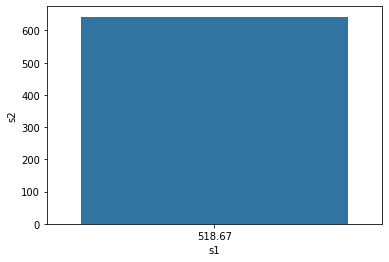

In [50]:
sns.barplot(x='s1', y='s2', data=X) # from s1 to s21

## xem phân phối

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s2', ylabel='Density'>

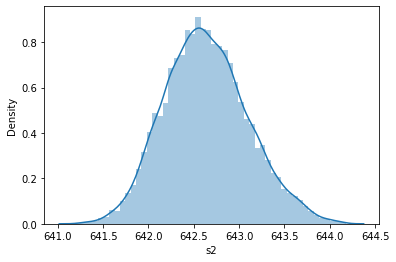

In [51]:
sns.distplot(a=data['s2'], kde=True)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1= data_train[col_names].iloc[:,:]
vif_scores(df1)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Independent Features,VIF Scores
0,s1,0.000000e+00
1,s2,2.260884e+00
2,s3,2.282864e+00
3,s4,4.578003e+00
4,s5,1.659149e-25
5,s6,4.349514e-02
6,s7,4.237020e+00
7,s8,9.080392e-03
8,s9,1.648244e+01
9,s10,0.000000e+00


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


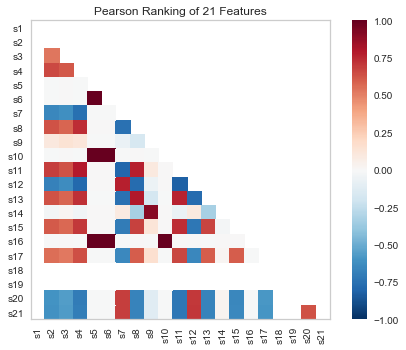

<AxesSubplot:title={'center':'Pearson Ranking of 21 Features'}>

In [70]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=col_names, algorithm='pearson')
visualizer.fit_transform(X=X.astype(float), y=data['ttf'])
visualizer.poof() 

In [58]:
features1 = ['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12',  's13','s14', 's15',  
            's17',  's20', 's21']

## ứng dụng

In [72]:
data_test = pd.read_csv('data/test.csv')

In [73]:
X_train =data_train[features1]
y_train = data_train['ttf']
X_test = data_test[features1]
y_test = data_test['ttf']

In [74]:
regression = LinearRegression()
regression.fit(X_train, y_train)
# hệ số hồi quy
w1 = regression.coef_
w1

array([  -6.82619263,   -0.43992454,   -0.76487049,    6.89434332,
        -13.39812984,   -0.35004037,  -37.31717914,   10.64905294,
        -12.17785101,   -0.27285953, -119.91854179,   -1.85159943,
         19.92111241,   41.09981995])

In [75]:
w0 =  regression.intercept_ 
w0

65161.85157447909

In [76]:
y_pred = regression.predict(X_test)
y_pred

array([158.3373346 , 122.31549319,  84.45455501,  97.98628544,
       112.08345096, 122.25441204, 130.91211159,  95.62639358,
       113.38644091, 117.71455622,  98.37926916, 113.07994607,
       102.56877419, 114.5049627 , 161.8561438 , 139.35484493,
        82.33481615,  80.60111275, 124.00352183,  24.1967903 ,
       119.77147747, 141.99071274, 154.9068335 ,  30.5187666 ,
       138.91581082, 142.91727411, 128.1519807 , 110.32147413,
       123.88225582,  99.25643287,  10.42384091, 105.14975686,
       106.14140481,  10.59671353,  -0.43954597,  37.50630437,
        81.18585037,  68.69091964, 156.30387076,  39.02786543,
        92.51775106,  42.09386298,  80.18377071, 118.70789512,
        83.77340731,  66.62060008, 125.45890282, 120.71944002,
        23.27507741, 126.70330604, 118.9158865 ,  49.09881887,
        44.00981353, 168.6242871 , 140.07837328,  38.25970897,
       107.80658632,  69.56358278, 165.58220878, 118.19888177,
        55.06791913,  86.8827165 ,  84.50658683,  65.65

In [77]:
# R bình % của dự đoán
r_sq = regression.score(X_test, y_test)
r_sq 

0.40877368076590137

In [78]:
df2 = pd.DataFrame({'thực': y_test, 'dự đoán': y_pred})
df2

,thực,dự đoán
0,112,158.337335
1,98,122.315493
2,69,84.454555
3,82,97.986285
4,91,112.083451
...,...,...
95,137,166.786018
96,82,108.434012
97,59,98.666231
98,117,161.855232
